# Problem Set 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

## HMC for a double-well potential density

Design a HMC Sampler for posterior pi proportional to exp(-(x^2-4)^2)

In [37]:
#Designed by ChatGPT
def potential_energy(x):
    # Define your potential energy function here
    # It should take a position vector x as input and return a scalar value
    # The potential energy can be derived from the negative log posterior distribution in Bayesian inference
    return -1*np.log(np.exp(-(x**2-4)**2))

def gradient_potential_energy(x):
    # Compute the gradient of the potential energy function with respect to x
    # This is usually done analytically or numerically using techniques like automatic differentiation
    return -2*x*np.exp(-x**2+4)

def hamiltonian_dynamics(x, p, epsilon, L):
    # Perform the Hamiltonian dynamics simulation for L leapfrog steps with a given step size epsilon
    # x: position vector
    # p: momentum vector
    # epsilon: step size
    # L: number of leapfrog steps
    x_new, p_new = x.copy(), p.copy()
    grad = gradient_potential_energy(x_new)
    p_new -= 0.5 * epsilon * grad
    for _ in range(L):
        x_new += epsilon * p_new
        grad = gradient_potential_energy(x_new)
        p_new -= epsilon * grad
    x_new += 0.5 * epsilon * p_new
    return x_new, p_new

def hmc(num_samples, dim, epsilon, L):
    # Initialize samples
    samples = np.zeros((num_samples, dim))
    x = np.ones(dim)*2

    for i in range(num_samples):
        # Sample momentum
        p = np.random.randn(dim)

        # Perform leapfrog integration
        x_new, p_new = hamiltonian_dynamics(x, p, epsilon, L)

        # Metropolis-Hastings acceptance step
        current_energy = potential_energy(x)
        new_energy = potential_energy(x_new)
        if np.random.rand() < np.exp(current_energy - new_energy):
            if np.random.rand() < 0.5:
                x = x_new
            else:
                x = -x_new
        samples[i] = x

    return samples

# Usage
num_samples = 100000
dim = 1
epsilon = 0.01
L = 10

samples = hmc(num_samples, dim, epsilon, L)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 6.000e+00, 4.000e+00, 2.000e+00,
        1.800e+01, 9.000e+00, 1.300e+01, 1.400e+01, 2.000e+01, 3.200e+01,
        3.500e+01, 4.700e+01, 3.500e+01, 4.800e+01, 6.600e+01, 8.300e+01,
        1.030e+02, 1.200e+02, 1.150e+02, 1.440e+02, 1.830e+02, 1.900e+02,
        2.560e+02, 2.860e+02, 3.230e+02, 3.710e+02, 3.880e+02, 4.320e+02,
        5.260e+02, 5.220e+02, 5.690e+02, 6.770e+02, 7.130e+02, 7.900e+02,
        7.890e+02, 8.900e+02, 9.070e+02, 9.990e+02, 1.040e+03, 1.088e+03,
        1.116e+03, 1.148e+03, 1.144e+03, 1.269e+03, 1.265e+03, 1.351e+03,
        1.381e+03, 1.379e+03, 1.424e+03, 1.327e+03, 1.339e+03, 1.299e+03,
        1.331e+03, 1.244e+03, 1.300e+03, 1.251e+03, 1.198e+03, 1.123e+03,
        1.152e+03, 1.125e+03, 1.010e+03, 9.710e+02, 9.580e+02, 8.830e+02,
        7.840e+02, 7.930e+02, 6.950e+0

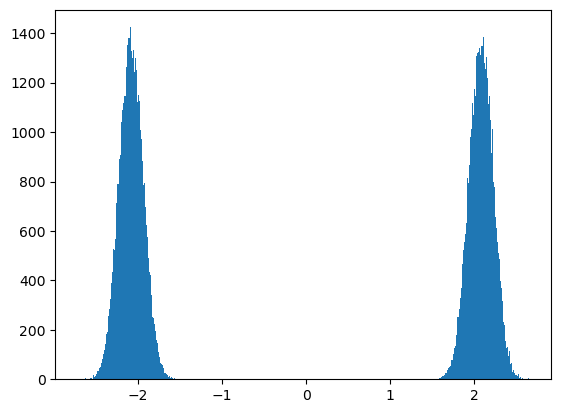

In [39]:
binwidth = 0.01
bins=np.arange(min(samples), max(samples) + binwidth, binwidth)
plt.hist(samples, bins=bins)